In [1]:
import pickle as pkl
import numpy as np
import os

In [15]:
#gather data
solution_folder = '../results/20210806'

steps = []
with open(os.path.join(solution_folder, 'ActionsPerEpisode.txt'), 'rb') as f:
    for line in f.readlines():
        steps.append(float(line))


In [16]:
#check steps is filled
for i in range(5):
    print(steps[i])

38.0
54.0
46.0
74.0
10.0


In [17]:
#gather medians of last 20 episodes
median = []
for i in range((len(steps)-20)):
    counted=[]
    for j in range(20):
        counted.append(steps[i+j])
    median.append(np.median(counted))

In [18]:
#check median data
len(median)

3215

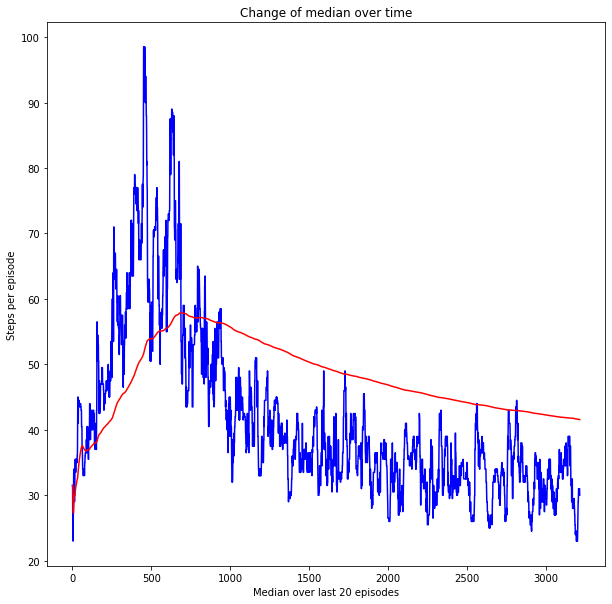

In [19]:
#graph with best fit line
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
plt.plot(median, 'b')

bestFit=[]
for i in range(len(median)):
    counted=[]
    for j in range(i):
        counted.append(median[j])    
    bestFit.append(np.mean(counted))
plt.plot(bestFit, 'r')

plt.xlabel('Median over last 20 episodes')
plt.ylabel('Steps per episode')
plt.title('Change of median over time')

plt.show()

In [22]:
#find optimal training time using raw data
max=0
maxIndex=0
for i in range(len(median)):
    if median[i]>max:
        max = median[i]
        maxIndex = i
print('Raw Data (Blue): At ', maxIndex+20, ', median is', max)
#find optimal training time using best fit line
max=0
maxIndex=0
for i in range(len(bestFit)):
    if bestFit[i]>max:
        max = bestFit[i]
        maxIndex = i
print('Best Fit (Red): At ', maxIndex+20, ', median is', max)

Raw Data (Blue): At  471 , median is 98.5
Best Fit (Red): At  708 , median is 57.93313953488372


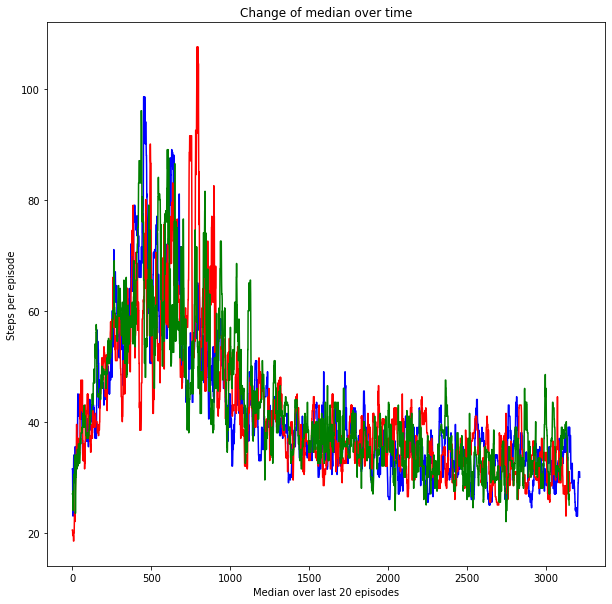

In [60]:
#Plot For Multiple Runs
import matplotlib.pyplot as plt
import numpy as np


#gather data
NumFiles=3

folder={}
folder[0]='../results/RL3/20210806_0'
folder[1]='../results/20210805'
folder[2]='../results/RL3/20210806_1'

#Initial plot
plt.figure(figsize=(10,10))
color={}
color[0]=('b')
color[1]=('r')
color[2]=('g')

steps = {}
median = {}
for file_num in range(NumFiles):
    steps[file_num]=[]
    #read file
    with open(os.path.join(folder[file_num], 'ActionsPerEpisode.txt'), 'rb') as f:
        for line in f.readlines():
            steps[file_num].append(float(line))
    
    #gather medians of last 20 episodes
    median[file_num]=[]
    for i in range((len(steps[file_num])-20)):
        counted=[]
        for j in range(20):
            counted.append(steps[file_num][i+j])
        median[file_num].append(np.median(counted))
    #graph with best fit line
    plt.plot(median[file_num], color[file_num])


plt.xlabel('Median over last 20 episodes')
plt.ylabel('Steps per episode')
plt.title('Change of median over time')

plt.show()

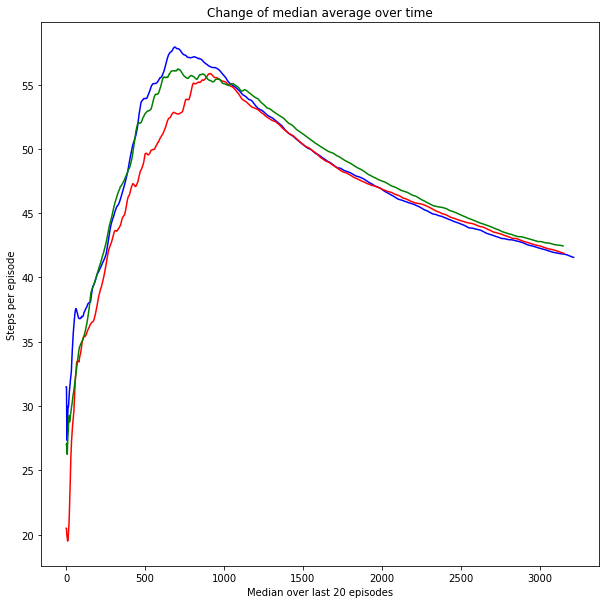

Best Fit 0 ( b ) At  708 , median is 57.93313953488372
Best Fit 1 ( r ) At  931 , median is 55.86663007683864
Best Fit 2 ( g ) At  728 , median is 56.22104519774011


In [61]:
#Plot best fit For Multiple Runs
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))

bestFit={}
for file_num in range(NumFiles):
    bestFit[file_num]=[]
    for i in range(len(median[file_num])):
        counted=[]
        for j in range(i):
            counted.append(median[file_num][j])    
        bestFit[file_num].append(np.mean(counted))
    
    plt.plot(bestFit[file_num], color[file_num])

plt.xlabel('Median over last 20 episodes')
plt.ylabel('Steps per episode')
plt.title('Change of median average over time')

plt.show()


#find optimal training time using best fit line
max={}
maxIndex={}
for file_num in range(NumFiles):
    max[file_num]=0
    maxIndex[file_num]=0
    for i in range(len(bestFit[file_num])):
        if bestFit[file_num][i]>max[file_num]:
            max[file_num] = bestFit[file_num][i]
            maxIndex[file_num] = i
    print('Best Fit', file_num, '(', color[file_num], ') At ', maxIndex[file_num]+20, ', median is', max[file_num])